In [70]:
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import netCDF4  # or import h5netcdf
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [71]:
from tqdm import tqdm
import sys

In [72]:
import geopandas as gpd
from shapely.geometry import Point

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [74]:
# Import PyTorch
import torch
from torch import nn
import torch.optim as optim
import  torchvision.transforms as transforms

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu126
torchvision version: 0.21.0+cu126


In [75]:
seed = 42  # Choose any number

# Set seed for PyTorch
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # If using CUDA
torch.cuda.manual_seed_all(seed)  # If using multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Set seed for NumPy and Python's random module
np.random.seed(seed)
random.seed(seed)

In [76]:
import os
num_cpu_cores = os.cpu_count()
print(f"Available CPU cores: {num_cpu_cores}")

Available CPU cores: 80


In [77]:
# Load from JSON file
with open(r"../data/species_universe_filtered_10.json", "r") as file:
    species_universe = json.load(file)
label_encoder = LabelEncoder()
label_encoder.fit(list(species_universe.keys()))
# Save the LabelEncoder
# with open('label_encoder.pkl', 'wb') as f:
#     pickle.dump(label_encoder, f)
for species, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{species}: {encoded_label}")
    break

Abies alba: 0


In [78]:
with open(r"../data/Full_Scale/10_filtered_vectorized_gbif_assemblages_climatic_1991-2018_32.pkl", "rb") as file:
    df = pickle.load(file)
df_2018 = df[df["year"] == 2018]
df_2018

,grid_index,year,species,longitude,latitude,climatic_map,species_vector
7,79231,2018,"[Tripolium pannonicum, Dactylorhiza majalis, L...",5.172939,59.201189,"[[[0.5033312, 0.0, 0.0, 0.0, 0.7999878, 0.0, 0...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
33,80722,2018,"[Lonicera periclymenum, Honckenya peploides, T...",5.192753,59.193655,"[[[0.49577808, 0.0, 0.0, 0.0, 0.7999878, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
39,80723,2018,"[Ficaria verna, Sanguisorba officinalis, Primu...",5.190191,59.202504,"[[[0.47734928, 0.0, 0.0, 0.0, 0.7999878, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
43,80725,2018,"[Aegopodium podagraria, Galium aparine, Lotus ...",5.185063,59.220202,"[[[0.47350216, 0.0, 0.0, 0.0, 0.7999878, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
49,80726,2018,"[Calluna vulgaris, Silene flos-cuculi, Thlaspi...",5.182497,59.229051,"[[[0.4809351, 0.0, 0.0, 0.0, 0.7999878, 0.0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
71381,1682879,2018,"[Lathyrus japonicus, Plantago maritima, Urtica...",28.683087,70.178482,"[[[0.6811869, 0.6164894, 0.33202517, 0.1088326...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71399,1694813,2018,"[Leymus arenarius, Hippuris lanceolata, Parnas...",28.876395,70.144992,"[[[0.46484423, 0.78116536, 0.46049523, 0.32456...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71464,1727626,2018,"[Atriplex nudicaulis, Oxytropis campestris, As...",29.370979,70.004077,"[[[0.51679707, 0.6700247, 0.63551474, 0.459785...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71687,1785872,2018,"[Phyllodoce caerulea, Cerastium alpinum, Pyrol...",30.743051,70.420846,"[[[0.50547314, 0.614113, 0.55096126, 0.4034529...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [79]:
# Convert species vectors to a NumPy array and sum along axis 0 (columns)
class_counts = np.sum(np.stack(df_2018['species_vector'].values), axis=0)

# Convert to dictionary format {class_index: count}
class_counts_dict = {i: int(count) for i, count in enumerate(class_counts)}

# print(class_counts_dict)

### Pytorch Dataset

In [80]:
class MultiLabelDataset(Dataset):
    def __init__(self):
        # self.x_train, self.x_val, self.x_test, self.y_train, self.y_val, self.y_test = None, None, None, None, None, None
        self.mode = 'test'

        self.images_no_perm = torch.tensor(np.stack(df_2018['climatic_map'].values).astype(np.float32))#.to(device)  # Move data to GPU
        self.labels = torch.tensor(np.stack(df_2018['species_vector'].values).astype(np.float32))#.to(device)  # Move labels to GPU
        self.images = []
    
        permuted_images = []
        for image in self.images_no_perm:
            permuted_image = image.permute(2, 0, 1)
            self.images.append(permuted_image)
        
        

    # def train_val_test_split(self):
    #     self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.images, self.labels, test_size = 0.15, random_state=42)
    #     self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size = 0.15, random_state=42)
    def __len__(self):

        if self.mode == 'test':
            return len(self.images)


    def __getitem__(self, idx):
        if self.mode == 'test':
            sample = {'images': self.images[idx], 'labels': self.labels[idx]}

        return sample

### CustomLoss

In [81]:
import torch.nn.functional as F
import torch.distributed as dist
import argparse

class CustomLoss(nn.Module):
    def __init__(self, loss_fn, args):
        super(CustomLoss, self).__init__()
        self.loss_fn = loss_fn
        self.weighted = args.weighted
        self.args = args
        if self.weighted:
            self.samples_per_cls = list(args.train_label_cnt.values())
            self.no_of_classes = args.num_classes

    def compute_weights(self, labels, beta=0.9999):
        effective_num = 1.0 - np.power(beta, self.samples_per_cls)
        weights = (1.0 - beta) / np.array(effective_num)
        weights = weights / weights.sum() * self.no_of_classes
        labels_one_hot = labels

        weights = torch.tensor(weights).float().to(self.args.device, non_blocking=True)
        weights = weights.unsqueeze(0)
        weights = weights.repeat(labels_one_hot.shape[0],1) * labels_one_hot
        
        return weights
    
    def forward_focal(self, logits, labels,alpha=0.999,gamma=2.0):
        p = torch.sigmoid(logits)
        ce_loss = F.binary_cross_entropy_with_logits(logits, labels, reduction="none")
        p_t = p * labels + (1 - p) * (1 - labels)
        loss = ce_loss * ((1 - p_t) ** gamma)
        
        if self.weighted:
            weights = self.compute_weights(labels)
            weights_t = weights * labels * alpha + (1 - labels) * (1 - alpha)
            weighted_loss = weights_t * loss
            focal_loss = weighted_loss.mean()
        
        else:
            alpha_t = alpha * labels + (1 - alpha) * (1 - labels)
            focal_loss = alpha_t * loss
            focal_loss = focal_loss.mean()
        
        return focal_loss

    
    def forward_bce(self, logits, labels):
        if self.weighted:
            weights = self.compute_weights(labels)
            bce_loss = F.binary_cross_entropy_with_logits(logits, labels, pos_weight = weights)
        else:
            bce_loss = F.binary_cross_entropy_with_logits(logits, labels)
        
        return bce_loss
    
    
    def forward_dice(self, logits, labels):
        p = torch.sigmoid(logits)
        smooth = 1.0
        intersection = (p * labels).sum(0)
        total = (p**2 + labels**2).sum(0)
        dice_loss = 1 - (intersection + smooth)/(total + smooth)
        
        return dice_loss.mean()
    
    
    def forward(self, logits, labels):
        if self.loss_fn == 'bce':
            return self.forward_bce(logits, labels)
        elif self.loss_fn == 'focal':
            return self.forward_focal(logits, labels)
        elif self.loss_fn == 'dice':
            return self.forward_dice(logits, labels)

### Evaluation Metrics

In [82]:
def compute_scores(outputs, targets, threshold=0.45):
    
    prob = outputs >= threshold
    label = targets >= threshold
    TP = (prob & label).sum(0).float()
    TN = ((~prob) & (~label)).sum(0).float()
    FP = (prob & (~label)).sum(0).float()
    FN = ((~prob) & label).sum(0).float()
    
    return TP, TN, FP, FN


def compute_metrics(TP, TN, FP, FN, weight):
    
    # macro true skill score
    macro_recall = TP / (TP + FN + 1e-8)
    macro_specificity = TN / (TN + FP + 1e-8)
    macro_tss = torch.mean(macro_recall + macro_specificity - 1)
    
    # micro true skill score
    micro_recall = TP.sum() / (TP.sum() + FN.sum())
    micro_specificity = TN.sum() / (TN.sum() + FP.sum())
    micro_tss = micro_recall + micro_specificity - 1
    
    # weighted true skill score
    weighted_recall = weight @ macro_recall
    weighted_specificity = weight @ macro_specificity
    weighted_tss = weighted_recall + weighted_specificity - 1
    
    # true skill score per class
    
    return macro_tss.item(), micro_tss.item(), weighted_tss.item()


def compute_metrics_per_cls(TP, TN, FP, FN):
    
    # macro true skill score
    recall = TP / (TP + FN + 1e-8)
    specificity = TN / (TN + FP + 1e-8)
    
    #P = TP + FN
    #N = FP + TN
    #prevalence = P / (P + N + 1e-8)
    
    # true skill score per class
    tss = recall + specificity - 1
    
    return recall, specificity, tss
    

def evaluate(model, eval_loader, criterion,thresholds, args):
    
    TP, TN, FP, FN = 0., 0., 0., 0.
    label_cnt = 0.
    eval_loss = []
    model.eval()
    with torch.no_grad():
        # for data, targets in tqdm(eval_loader, file=sys.stdout):
        for batch in eval_loader:
            if args.model_type=="MLP" or args.model_type=="CNN" or args.model_type=="ViT":
                samples = batch['images'].to(args.device, non_blocking=True)
                outputs = model(samples)
            elif args.model_type=="Fusion":
                samples_img, samples_meta = data
                samples_img = samples_img.to(args.device, non_blocking=True)
                samples_meta = samples_meta.to(args.device, non_blocking=True)
                outputs = model(samples_img, samples_meta)
                
            targets = batch['labels'].to(args.device, non_blocking=True)
            label_cnt += targets.sum(0).float()
            
            loss = criterion(outputs, targets)
            eval_loss.append(loss.item())
            
            if args.thres_method == 'adaptive':
                # thresholds = torch.load(args.output_dir.joinpath('thresholds_train.pth'))
                thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")
                # thresholds = torch.tensor(thresholds).to(args.device)
            elif args.thres_method == 'global':
                thresholds = args.threshold
                
            tp, tn, fp, fn = compute_scores(torch.sigmoid(outputs), targets, thresholds)
            TP += tp
            TN += tn
            FP += fp
            FN += fn
        
        eval_loss = torch.tensor(eval_loss).mean().item()
        weight = label_cnt / label_cnt.sum()
        macro_tss, micro_tss, weighted_tss = compute_metrics(TP, TN, FP, FN, weight=weight)
        
        if args.eval:
            recall, spec, tss = compute_metrics_per_cls(TP, TN, FP, FN)
            species = []
            cdref2species = pd.read_csv('filelist/cdref2species.csv')
            for ref in list(map(float, args.classes)):
                temp = cdref2species.loc[cdref2species.cd_ref==ref]
                species.append(temp.nom_reconnu.values[0])
            df = pd.DataFrame({'species':species, 'train_cnt':args.train_label_cnt.values(), 'test_cnt': args.test_label_cnt.values(), 'recall': recall.detach().cpu(), 'specificity': spec.detach().cpu(), 'tss':tss.detach().cpu()})
            df.to_csv(args.output_dir.joinpath('{}_tss_per_cls.csv'.format(args.model_type)), index=False)
            print('Per class performance saved!')
        
        eval_stats = {'eval_loss': eval_loss, 'macro_tss': macro_tss, 'micro_tss': micro_tss, 'weighted_tss': weighted_tss}
        
        return eval_stats

In [83]:
# Example args (you can replace it with your actual arguments)
class Args:
    def __init__(self):
        self.weighted = True  # Set to False if no class weighting is needed
        self.train_label_cnt = class_counts_dict  # Example class counts
        self.num_classes = 1819  # Binary classification
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model_type = 'CNN'
        self.eval = False
        self.thres_method = 'adaptive' # 'global'
        self.threshold = 0.15

In [84]:
# Function to set the seed for each worker
def seed_worker(worker_id):
    # Set seed for Python and NumPy in each worker
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [85]:
mlc_dataset = MultiLabelDataset()
print(len(mlc_dataset))
# mlc_dataset.train_val_test_split()
dataloader = DataLoader(mlc_dataset, batch_size = 32, shuffle = True, worker_init_fn=seed_worker)

5029


In [86]:
device = torch.device('cuda:0')

### Model

In [197]:
from torchvision import models, transforms

class CNNModel_1(nn.Module):
    def __init__(self, input_channels,input_size, num_classes):
        super(CNNModel_1, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=5, padding=2)  # 'same' padding in TensorFlow = padding=2
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))

        # Second Convolutional Block
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))

        # Third Convolutional Block
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))
        
        # Fourth Convolutional Block
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)  # MaxPooling2D(pool_size=(2, 2))

        # Fully Connected Layers
        self.fc1 = nn.Linear(512 * (input_size // 16) * (input_size // 16), 1024)  # Flatten output size depends on input size
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))

        x = torch.flatten(x, start_dim=1)  # Flatten the output for fully connected layers

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)   # x = torch.sigmoid(self.fc3(x))  # Assuming binary classification

        return x
    
# # Define Custom ResNet18 model
# class CustomResNet18(nn.Module):
#     def __init__(self, num_classes):
#         super(CustomResNet18, self).__init__()
        
#         # Load Pretrained ResNet18
#         self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

#         # Modify the first convolutional layer to accept 11 channels instead of 3
#         self.resnet.conv1 = nn.Conv2d(11, 64, kernel_size=7, stride=2, padding=3, bias=False)

#         # Modify the final fully connected layer to match the number of classes
#         self.in_features = self.resnet.fc.in_features
#         self.resnet.fc = nn.Linear(self.in_features, num_classes)

#         # Freeze all layers initially
#         for param in self.resnet.parameters():
#             param.requires_grad = False

#     def forward(self, x):
#         return self.resnet(x)

class CustomResNet18(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet18, self).__init__()

        # Load Pretrained ResNet18
        self.resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        
        # Replace ReLU activations with inplace=False to avoid in-place modification issues
        # self.resnet.relu = nn.ReLU(inplace=False)

        # Modify the first convolutional layer to accept 11 channels instead of 3
        self.resnet.conv1 = nn.Conv2d(11, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Access layers up to the last block of layer4
        # self.features_conv = self.resnet.layer4[-1]  # Excluding the last block in layer4
        self.hook = self.resnet.layer3[-1].conv2.register_forward_hook(self.hook_fn)
        self.activations = None

        # Modify the final fully connected layer to match the number of classes     
        self.in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.in_features, num_classes)

        # Freeze all layers initially
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Placeholder for gradients
        self.gradients = None

    # Hook for capturing gradients during backward pass
    def activations_hook(self, grad):
        self.gradients = grad
        
    def hook_fn(self, module, input, output):
        # Store activations from the last convolutional layer
        self.activations = output
        
    # Forward pass through the network
    def forward(self, x):
        # Pass through the layers until the last convolutional block
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        # Register the hook on the output of the last convolutional layer (conv2 of the last block)
        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)
        
        # Register hook on the output of the last convolutional layer in layer4[1]
        x.requires_grad_()  # Enable gradient computation for this tensor
        h = x.register_hook(self.activations_hook)
        
        # Continue through the network
        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.resnet.fc(x)
        
        return x
    
    def get_embedding(self, x):
        # Forward pass up to avgpool
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)  # Shape: [batch_size, 2048]
        return x
    
    # Method to get the captured gradients
    def get_activations_gradient(self):
        return self.gradients

    # Method to get activations from the last convolutional layer (optional)
    def get_activations(self):
        return self.activations
    

In [198]:
# Load the NumPy array from the pickle file
with open('../models/thresholds_focal_RESNET18_49_tss_2017.pkl', 'rb') as f:
    loaded_thresholds = pickle.load(f)
# with open('../models/thresholds_BCE_60_tss.pkl', 'rb') as f:
#     loaded_thresholds = pickle.load(f)

In [199]:
PATH = '../models/RESNET18_49_tss_2017'
# PATH = '../models/CNNModel_1_BCE_61_tss'


In [200]:
num_classes = 1819

MODEL = CustomResNet18(num_classes=num_classes).to(device)
# MODEL = CNNModel_1(11,32,num_classes).to(device)
MODEL.load_state_dict(torch.load(PATH, weights_only=True))
# model.to(args.device) 
MODEL.eval()


CustomResNet18(
  (resnet): ResNet(
    (conv1): Conv2d(11, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [201]:
# RESNET18 # Accessing the first two blocks of layer1


In [202]:
# for name, module in RESNET18.named_modules():
#     print(name, module)

### Evaluate

In [205]:
args = Args()

mlc_dataset.mode = 'test'
eval_stats = evaluate(model = MODEL, eval_loader = dataloader, criterion = CustomLoss('focal', args), thresholds = loaded_thresholds, args = Args())
print(eval_stats)

/tmp/ipykernel_17117/4269621591.py:17: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_17117/4269621591.py:18: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_17117/3640960823.py:77: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



{'eval_loss': nan, 'macro_tss': 0.3840070366859436, 'micro_tss': 0.476947546005249, 'weighted_tss': 0.34012436866760254}


### Focus on SP

In [100]:
with open('../data/species_universe_filtered_10.json', 'rb') as f:
    species_universe = json.load(f)
    
species_universe['Potentilla erecta']

398

In [102]:
def extract_position(model, eval_loader, name, criterion,thresholds,args): 
    selected_images = []
    sp_index = species_universe[name]
    eval_loss = []
    model.eval()
    with torch.no_grad():
        # for data, targets in tqdm(eval_loader, file=sys.stdout):
        for batch in eval_loader:
            samples = batch['images'].to(args.device, non_blocking=True)
            outputs = model(samples)
                
            targets = batch['labels'].to(args.device, non_blocking=True)            
            loss = criterion(outputs, targets)
            eval_loss.append(loss.item())
            
            if args.thres_method == 'adaptive':
                # thresholds = torch.load(args.output_dir.joinpath('thresholds_train.pth'))
                thresholds = torch.tensor(thresholds, dtype=torch.float32).to("cuda:0")
                # thresholds = torch.tensor(thresholds).to(args.device)
            elif args.thres_method == 'global':
                thresholds = args.threshold
            
            prob = torch.sigmoid(outputs) >= thresholds
            label = targets >= thresholds
            
            # print('prob',prob)
            # print('prob shape',prob.shape)

            # print('label',label)
            # print(samples.shape[0])
            # Go through the batch
            for i in range(samples.shape[0]):
                if prob[i][sp_index]:
                    selected_images.append(samples[i].cpu())  # .cpu() if you want to manipulate or save later



        eval_loss = torch.tensor(eval_loss).mean().item()

        return selected_images
    

In [239]:
images = extract_position(model = MODEL,eval_loader = dataloader,name = 'Polystichum lonchitis', criterion = CustomLoss('focal', args), thresholds = loaded_thresholds, args = Args())


/tmp/ipykernel_17117/4269621591.py:17: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_17117/4269621591.py:18: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_17117/2562459291.py:18: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [240]:
len(images),images[0].shape

(1745, torch.Size([11, 32, 32]))

## Saliency Maps

In [105]:
img_num = 0

# Load image and label
image_np = df_2018.iloc[img_num]['climatic_map'].astype(np.float32)  # shape: (H, W, 11)
label_np = df_2018.iloc[img_num]['species_vector'].astype(np.float32)  # shape: (num_classes,)

# Convert to torch tensors
image_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device)  # [1, 11, H, W]
label_tensor = torch.tensor(label_np).unsqueeze(0).to(device)  # [1, num_classes]


In [106]:
image_tensor.squeeze().shape

torch.Size([11, 32, 32])

In [223]:
def saliency(img_num, model):
  
    image_np = df_2018.iloc[img_num]['climatic_map'].astype(np.float32)  # shape: (H, W, 11)
    label_np = df_2018.iloc[img_num]['species_vector'].astype(np.float32)  # shape: (num_classes,)

    image_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device)  # [1, 11, H, W]
    label_tensor = torch.tensor(label_np).unsqueeze(0).to(device)  # [1, num_classes]
    # we would run the model in evaluation mode
    model.eval()
    X = image_tensor

    # we need to find the gradient with respect to the input image, so we need to call requires_grad_ on it
    X.requires_grad_()

    '''
    forward pass through the model to get the scores, note that VGG-19 model doesn't perform softmax at the end
    and we also don't need softmax, we need scores, so that's perfect for us.
    '''
    scores = model(X)

    # Get the index corresponding to the maximum score and the maximum score itself.
    score_max_index = scores.argmax()
    score_max = scores[0,score_max_index]

    '''
    backward function on score_max performs the backward pass in the computation graph and calculates the gradient of 
    score_max with respect to nodes in the computation graph
    '''
    score_max.backward()

    '''
    Saliency would be the gradient with respect to the input image now. But note that the input image has 3 channels,
    R, G and B. To derive a single class saliency value for each pixel (i, j),  we take the maximum magnitude
    across all colour channels.
    '''
    saliency, _ = torch.max(X.grad.data.abs(),dim=1)
    print('saliency',saliency)
    print('saliency shape',saliency.shape)

    saliency = saliency.cpu().detach().numpy()
    # code to plot the saliency map as a heatmap
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis('off')
    plt.colorbar()
    plt.show()

saliency tensor([[[0.0022, 0.0017, 0.0024,  ..., 0.0099, 0.0052, 0.0049],
         [0.0029, 0.0038, 0.0041,  ..., 0.0121, 0.0064, 0.0042],
         [0.0025, 0.0035, 0.0030,  ..., 0.0148, 0.0042, 0.0054],
         ...,
         [0.0037, 0.0064, 0.0051,  ..., 0.0024, 0.0010, 0.0007],
         [0.0018, 0.0027, 0.0021,  ..., 0.0008, 0.0010, 0.0006],
         [0.0015, 0.0026, 0.0025,  ..., 0.0017, 0.0007, 0.0007]]],
       device='cuda:0')
saliency shape torch.Size([1, 32, 32])


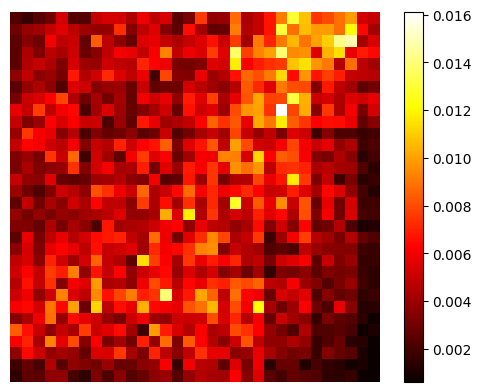

In [224]:
saliency(0, MODEL)


In [219]:
def saliency_images(images,num, model):
  
    # we would run the model in evaluation mode
    model.eval()
    X = images[num].unsqueeze(0).to(device)
    X = X.clone().detach().requires_grad_(True).to(device)

    # we need to find the gradient with respect to the input image, so we need to call requires_grad_ on it
    X.requires_grad_()
    '''
    forward pass through the model to get the scores, note that VGG-19 model doesn't perform softmax at the end
    and we also don't need softmax, we need scores, so that's perfect for us.
    '''
    scores = model(X)

    # Get the index corresponding to the maximum score and the maximum score itself.
    score_max_index = scores.argmax()
    score_max = scores[0,score_max_index]

    '''
    backward function on score_max performs the backward pass in the computation graph and calculates the gradient of 
    score_max with respect to nodes in the computation graph
    '''
    score_max.backward()

    '''
    Saliency would be the gradient with respect to the input image now. But note that the input image has 3 channels,
    R, G and B. To derive a single class saliency value for each pixel (i, j),  we take the maximum magnitude
    across all colour channels.
    '''
    saliency, _ = torch.max(X.grad.data.abs(),dim=1)
    print('saliency',saliency)
    print('saliency shape',saliency.shape)

    saliency = saliency.cpu().detach().numpy()
    # code to plot the saliency map as a heatmap
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis('off')
    plt.colorbar()
    plt.show()

saliency tensor([[[0.0059, 0.0085, 0.0085,  ..., 0.0045, 0.0046, 0.0041],
         [0.0107, 0.0069, 0.0097,  ..., 0.0069, 0.0024, 0.0049],
         [0.0080, 0.0096, 0.0083,  ..., 0.0112, 0.0027, 0.0032],
         ...,
         [0.0048, 0.0043, 0.0053,  ..., 0.0054, 0.0051, 0.0049],
         [0.0029, 0.0023, 0.0059,  ..., 0.0059, 0.0048, 0.0049],
         [0.0038, 0.0044, 0.0033,  ..., 0.0036, 0.0025, 0.0025]]],
       device='cuda:0')
saliency shape torch.Size([1, 32, 32])


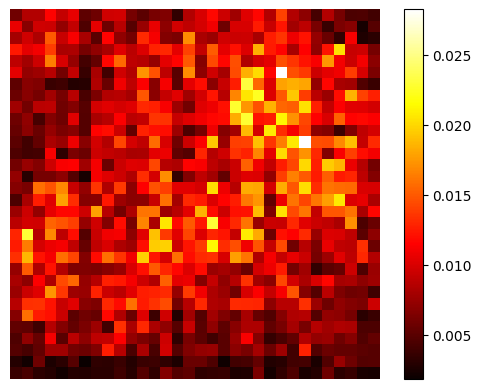

In [220]:
saliency_images(images=images,num=0, model=MODEL)


In [216]:
def saliency_one_species(img_num, model, target_class=None):
    image_np = df_2018.iloc[img_num]['climatic_map'].astype(np.float32)  # shape: (H, W, 11)
    label_np = df_2018.iloc[img_num]['species_vector'].astype(np.float32)  # shape: (num_classes,)

    image_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device)  # [1, 11, H, W]
    label_tensor = torch.tensor(label_np).unsqueeze(0).to(device)  # [1, num_classes]

    model.eval()
    X = image_tensor
    X.requires_grad_()

    scores = model(X)  # shape: [1, num_classes]

    if target_class is None:
        # Option 1: show saliency for **all present species** (can loop later if needed)
        present_classes = label_np.nonzero()[0]
        print(f"Present classes: {present_classes}")
        return

    # Get the logit for the selected target class
    score_target = scores[0, target_class]

    # Backprop to get gradient w.r.t. input
    model.zero_grad()
    score_target.backward()

    saliency, _ = torch.max(X.grad.data.abs(), dim=1)  # shape: [1, H, W]
    saliency = saliency.cpu().detach().numpy()

    # Plotting
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis('off')
    plt.title(f"Saliency for class {target_class}")
    plt.colorbar()
    plt.show()


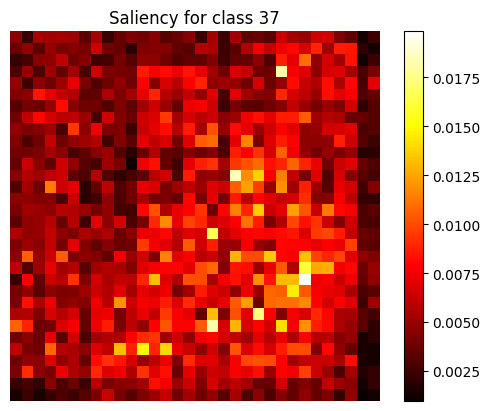

In [217]:
saliency_one_species(10, RESNET18, target_class=37)

In [218]:
def saliency_many_species(img_num, model, target_classes=None):
    image_np = df_2018.iloc[img_num]['climatic_map'].astype(np.float32)  # (H, W, 11)
    label_np = df_2018.iloc[img_num]['species_vector'].astype(np.float32)  # (num_classes,)

    image_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device)  # [1, 11, H, W]
    label_tensor = torch.tensor(label_np).unsqueeze(0).to(device)

    model.eval()
    X = image_tensor
    X.requires_grad_()

    scores = model(X)  # shape: [1, num_classes]

    if target_classes is None:
        # Default to present classes
        present_classes = label_np.nonzero()[0]
        print(f"Present classes: {present_classes}")
        return

    # You can pass a list like [3, 15, 22]
    if isinstance(target_classes, int):
        target_classes = [target_classes]

    # Sum the logits for selected classes
    score_sum = scores[0, target_classes].sum()

    # Backprop
    model.zero_grad()
    score_sum.backward()

    # Compute saliency
    saliency, _ = torch.max(X.grad.data.abs(), dim=1)  # [1, H, W]
    saliency = saliency.cpu().detach().numpy()

    # Plot
    plt.imshow(saliency[0], cmap=plt.cm.hot)
    plt.axis('off')
    plt.title(f"Saliency for classes {target_classes}")
    plt.colorbar()
    plt.show()


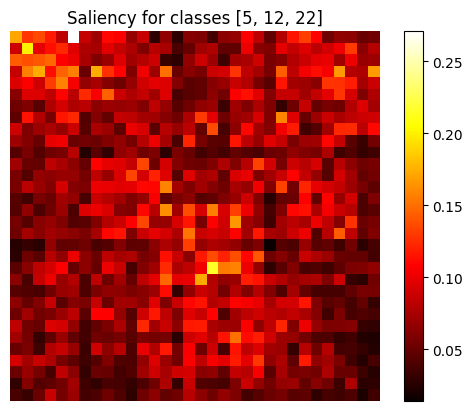

In [214]:
saliency_many_species(12, RESNET18, target_classes=[5, 12, 22])

In [215]:
def saliency_per_channel(img_num, model, target_classes=None, channel_names=None):
    image_np = df_2018.iloc[img_num]['climatic_map'].astype(np.float32)  # (H, W, C)
    label_np = df_2018.iloc[img_num]['species_vector'].astype(np.float32)

    image_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device)  # [1, C, H, W]
    label_tensor = torch.tensor(label_np).unsqueeze(0).to(device)

    model.eval()
    X = image_tensor
    X.requires_grad_()

    scores = model(X)

    if target_classes is None:
        present_classes = label_np.nonzero()[0]
        print(f"Present classes: {present_classes}")
        return

    if isinstance(target_classes, int):
        target_classes = [target_classes]

    score_sum = scores[0, target_classes].sum()

    model.zero_grad()
    score_sum.backward()

    # Saliency for each channel
    saliency = X.grad.data.abs()[0].cpu().detach().numpy()  # shape: [C, H, W]

    # Plot all channels
    num_channels = saliency.shape[0]
    plt.figure(figsize=(15, 2 * num_channels))
    for i in range(num_channels):
        plt.subplot((num_channels + 1) // 2, 2, i + 1)
        plt.imshow(saliency[i], cmap='hot')
        title = f"Channel {i}" if channel_names is None else channel_names[i]
        plt.colorbar()
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


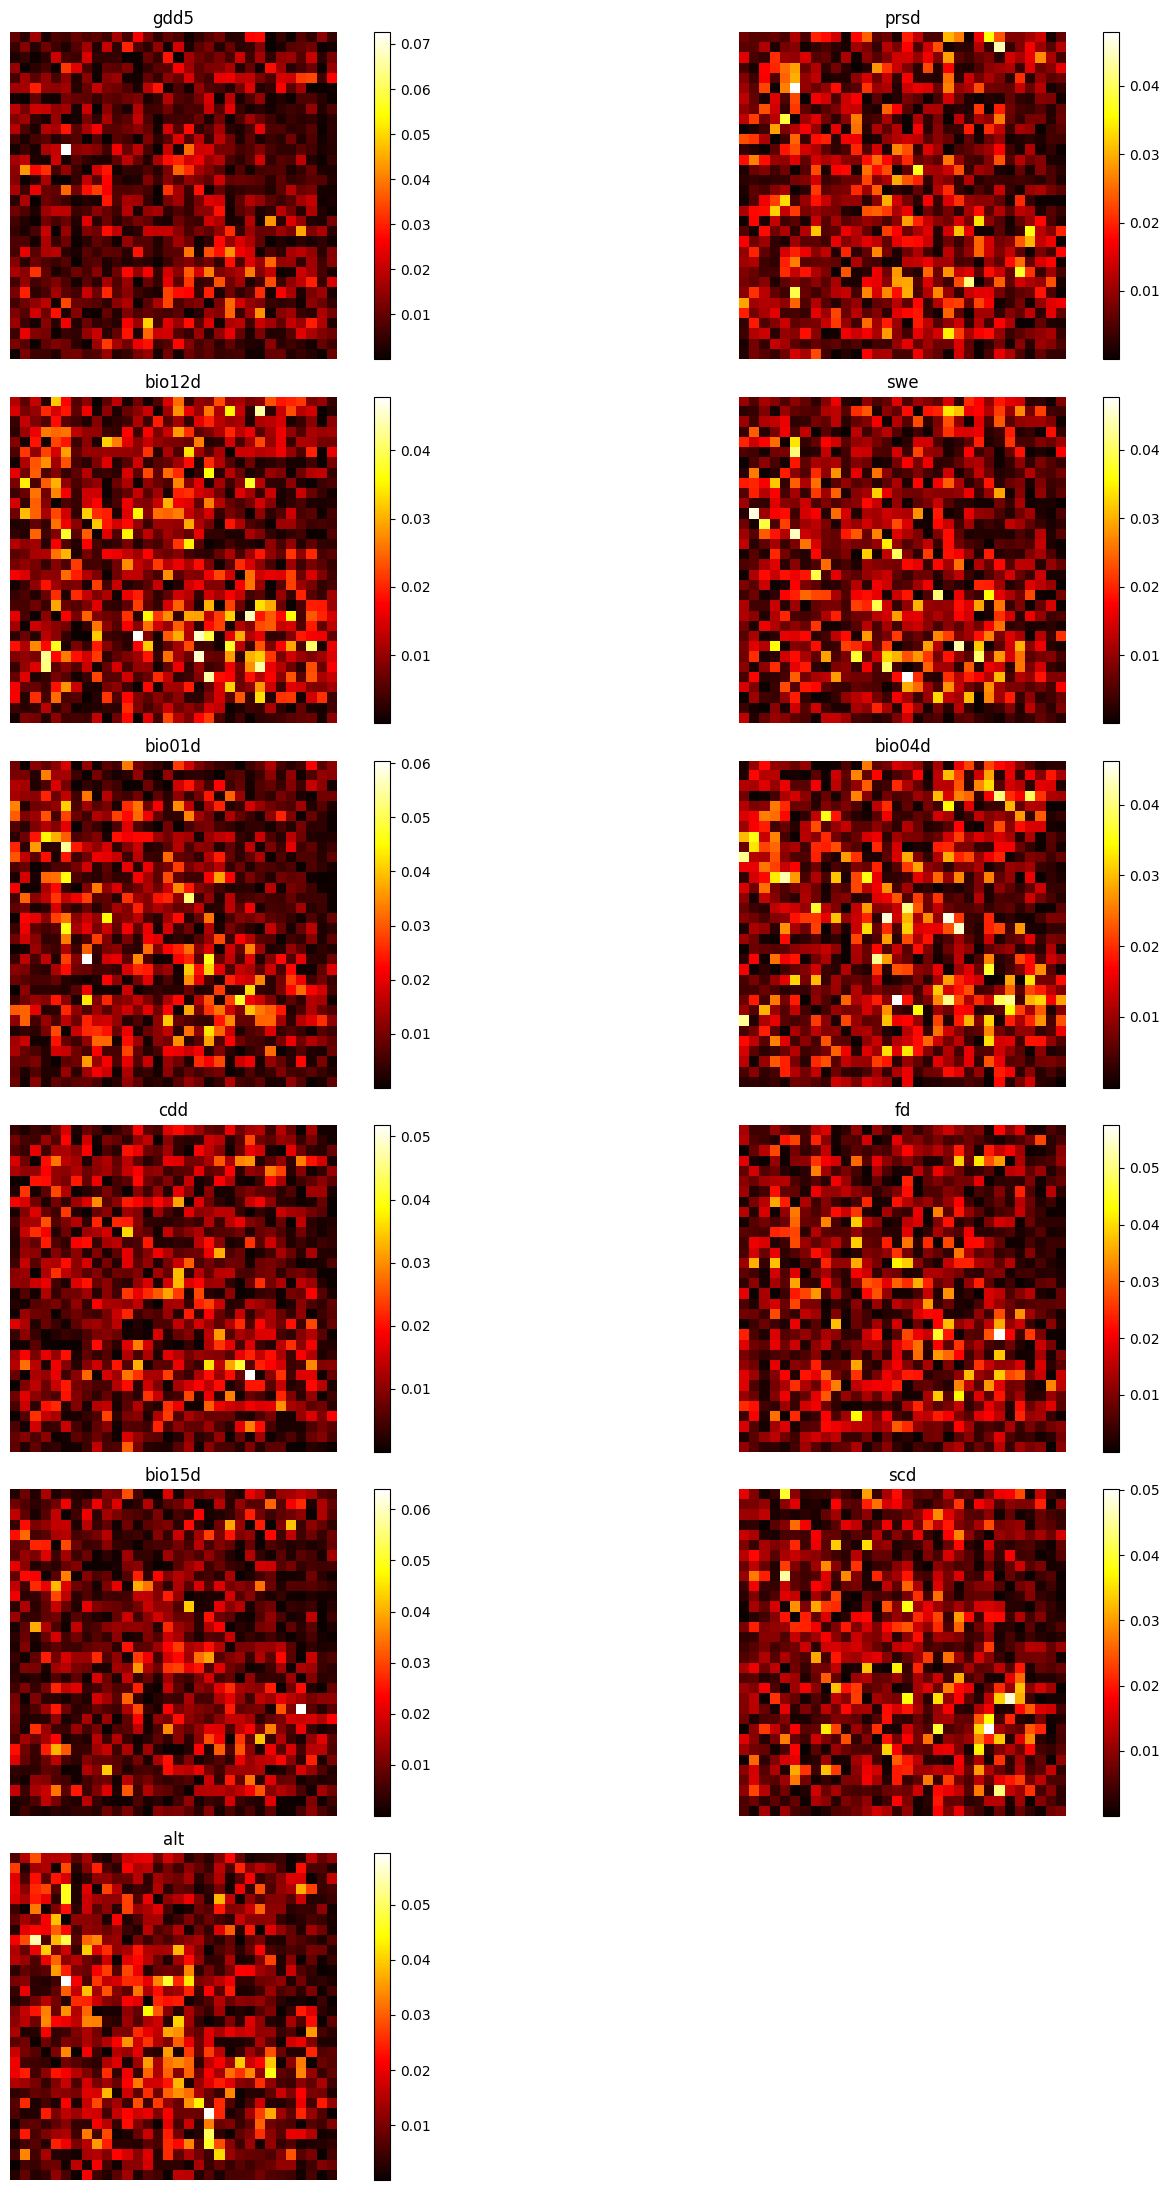

In [212]:
# Optional: provide names for the channels
climatic_variables = ['gdd5', 'prsd', 'bio12d', 'swe', 'bio01d', 'bio04d', 'cdd', 'fd', 'bio15d', 'scd','alt']
# Visualize saliency per channel for a group of species
saliency_per_channel(img_num=5, model=RESNET18, target_classes=[3, 9, 17], channel_names=climatic_variables)


## Clustering Logits 

In [140]:
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
def umap_logits(model, eval_loader): 
    all_embeddings = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        # for data, targets in tqdm(eval_loader, file=sys.stdout):
        for batch in eval_loader:
            samples = batch['images'].to(args.device, non_blocking=True)
            embeddings = model.get_embedding(samples)
            all_embeddings.append(embeddings.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    # Convert to arrays
    X = np.vstack(all_embeddings)  # Shape: [N_samples, 2048]
    y = np.concatenate(all_labels)

    reducer = umap.UMAP(n_components=3, random_state=42)
    X_umap = reducer.fit_transform(X)

    return selected_images

In [ ]:
umap_logits(model = MODEL,eval_loader = dataloader)

#### Testing Umap

In [154]:
all_embeddings = []
all_labels = []
MODEL.eval()
with torch.no_grad():
    # for data, targets in tqdm(eval_loader, file=sys.stdout):
    for batch in dataloader:
        samples = batch['images'].to(args.device, non_blocking=True)
        labels = batch['labels'].to(args.device, non_blocking=True)
        embeddings = MODEL.get_embedding(samples)
        all_embeddings.append(embeddings.cpu().numpy())
        all_labels.append(labels.cpu().numpy())
# Convert to arrays
X = np.vstack(all_embeddings)  # Shape: [N_samples, 2048]
y = np.concatenate(all_labels)

reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = reducer.fit_transform(X)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


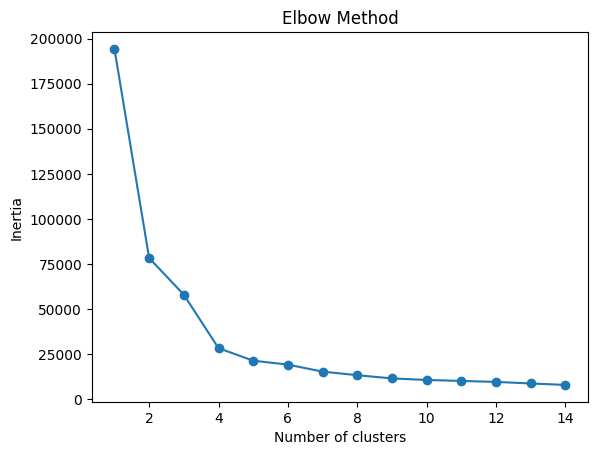

In [174]:
# Optional: Elbow method
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



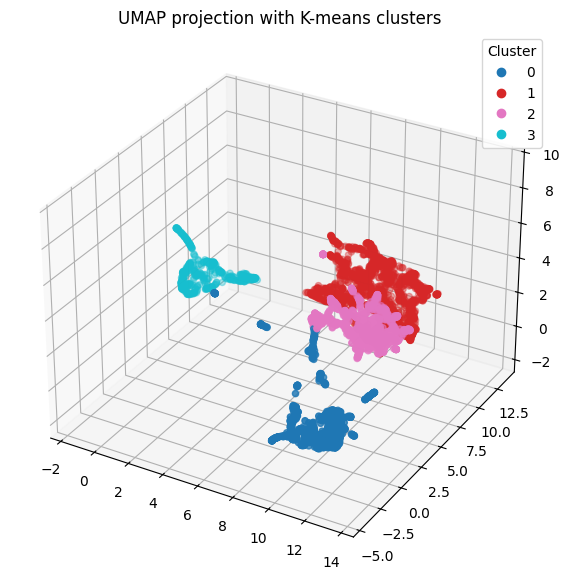

In [175]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Final model with chosen K
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_umap)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2],
                     c=clusters, cmap='tab10', s=20)
ax.set_title("UMAP projection with K-means clusters")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


## Shap Values

In [196]:
import shap

class NoInplaceResNetWrapper(nn.Module):
    def __init__(self, model):
        super(NoInplaceResNetWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        # Temporarily disable in-place operations in the forward pass for SHAP
        x = x.clone()  # Clone input to avoid in-place changes during SHAP calculation
        return self.model(x)

model_wrapper = NoInplaceResNetWrapper(MODEL)  # Wrap the original model

# with torch.no_grad():
#     # for data, targets in tqdm(eval_loader, file=sys.stdout):
for batch in dataloader:
    samples = batch['images'].to(args.device, non_blocking=True)
    labels = batch['labels'].to(args.device, non_blocking=True)
    break


explainer = shap.DeepExplainer(model_wrapper, samples)

# Get SHAP values
shap_values = explainer.shap_values(samples)

# Visualize the SHAP values
shap.summary_plot(shap_values, samples)  # Plot for global feature importance
shap.image_plot(shap_values, samples)    # Visualize SHAP values on images


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

### Shap values example

In [206]:
import torch
import shap
import matplotlib.pyplot as plt
import numpy as np

# Example: Assume you have a trained CNN model (e.g., ResNet18)
from torchvision import models
model = models.resnet18(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Example dataset (e.g., a single image from CIFAR-10 or any other dataset)
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224))])  # Resize for ResNet input
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
image, _ = dataset[0]  # Load the first image from the dataset
image = image.unsqueeze(0)  # Add batch dimension

# Initialize SHAP Deep Explainer
explainer = shap.DeepExplainer(model, image)

# Compute SHAP values for the image
shap_values = explainer.shap_values(image)

# shaps_values is a list of SHAP values, one per output (class or task). For a classification problem, it's a list of length 1000 for ResNet.
# We'll focus on the first class (index 0) here, but you can modify this for a specific class of interest.
shap_values_class_0 = shap_values[0]  # SHAP values for the first class

# The output SHAP values are in the form (batch_size, channels, height, width), e.g., for ResNet, (1, 64, 224, 224)
# We need to aggregate SHAP values over the spatial dimensions (height and width) for each channel.
channel_shap_values = shap_values_class_0[0]  # Remove batch dimension
channel_importance = torch.sum(torch.abs(channel_shap_values), dim=(1, 2))  # Sum SHAP values over height and width for each channel

# Convert to numpy for plotting
channel_importance = channel_importance.detach().cpu().numpy()

# Plot the channel importance (e.g., bar plot showing contribution of each channel)
plt.figure(figsize=(12, 6))
plt.bar(range(len(channel_importance)), channel_importance)
plt.title('Channel Contribution via SHAP Values')
plt.xlabel('Channel')
plt.ylabel('Aggregated SHAP Value')
plt.show()

# Optionally, visualize SHAP values for specific channels as heatmaps
# Here we visualize the SHAP values for the first channel as a heatmap
shap_values_first_channel = shap_values_class_0[0, 0].detach().cpu().numpy()  # First channel
plt.imshow(shap_values_first_channel, cmap='hot')
plt.colorbar()
plt.title('SHAP Values for Channel 0')
plt.show()


/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.

100%|██████████| 170M/170M [00:08<00:00, 21.2MB/s] 


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

## Trying with captum

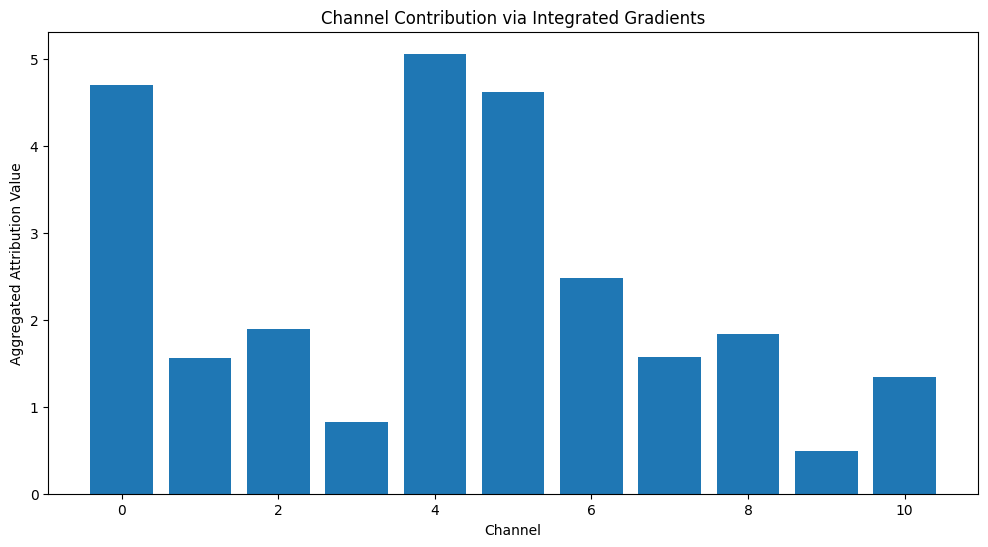

In [252]:
for batch in dataloader:
    samples = batch['images'].to(args.device, non_blocking=True)
    labels = batch['labels'].to(args.device, non_blocking=True)
    for i in range(samples.size(0)):  # Iterate over each sample in the batch
        sample = samples[i:i+1]  # Select the single sample (i-th sample in the batch)
        label = labels[i:i+1]    # Corresponding label for this sample
    break
# Define the IntegratedGradients attribution method
ig = IntegratedGradients(MODEL)

# Calculate the attribution for the image
attributions, delta = ig.attribute(sample, target=[9], return_convergence_delta=True)  # Assuming target is class 0

# The attribution result has shape (batch_size, channels, height, width)
# We want to analyze the contribution of each channel. Let's aggregate over the height and width.
channel_attributions = torch.sum(torch.abs(attributions), dim=(2, 3))  # Sum over height and width for each channel

# Convert to numpy for easier plotting
channel_attributions = channel_attributions.detach().cpu().numpy()

# Plot the channel contributions
plt.figure(figsize=(12, 6))
plt.bar(range(len(channel_attributions[0])), channel_attributions[0])  # Only the first image in the batch
plt.title('Channel Contribution via Integrated Gradients')
plt.xlabel('Channel')
plt.ylabel('Aggregated Attribution Value')
plt.show()



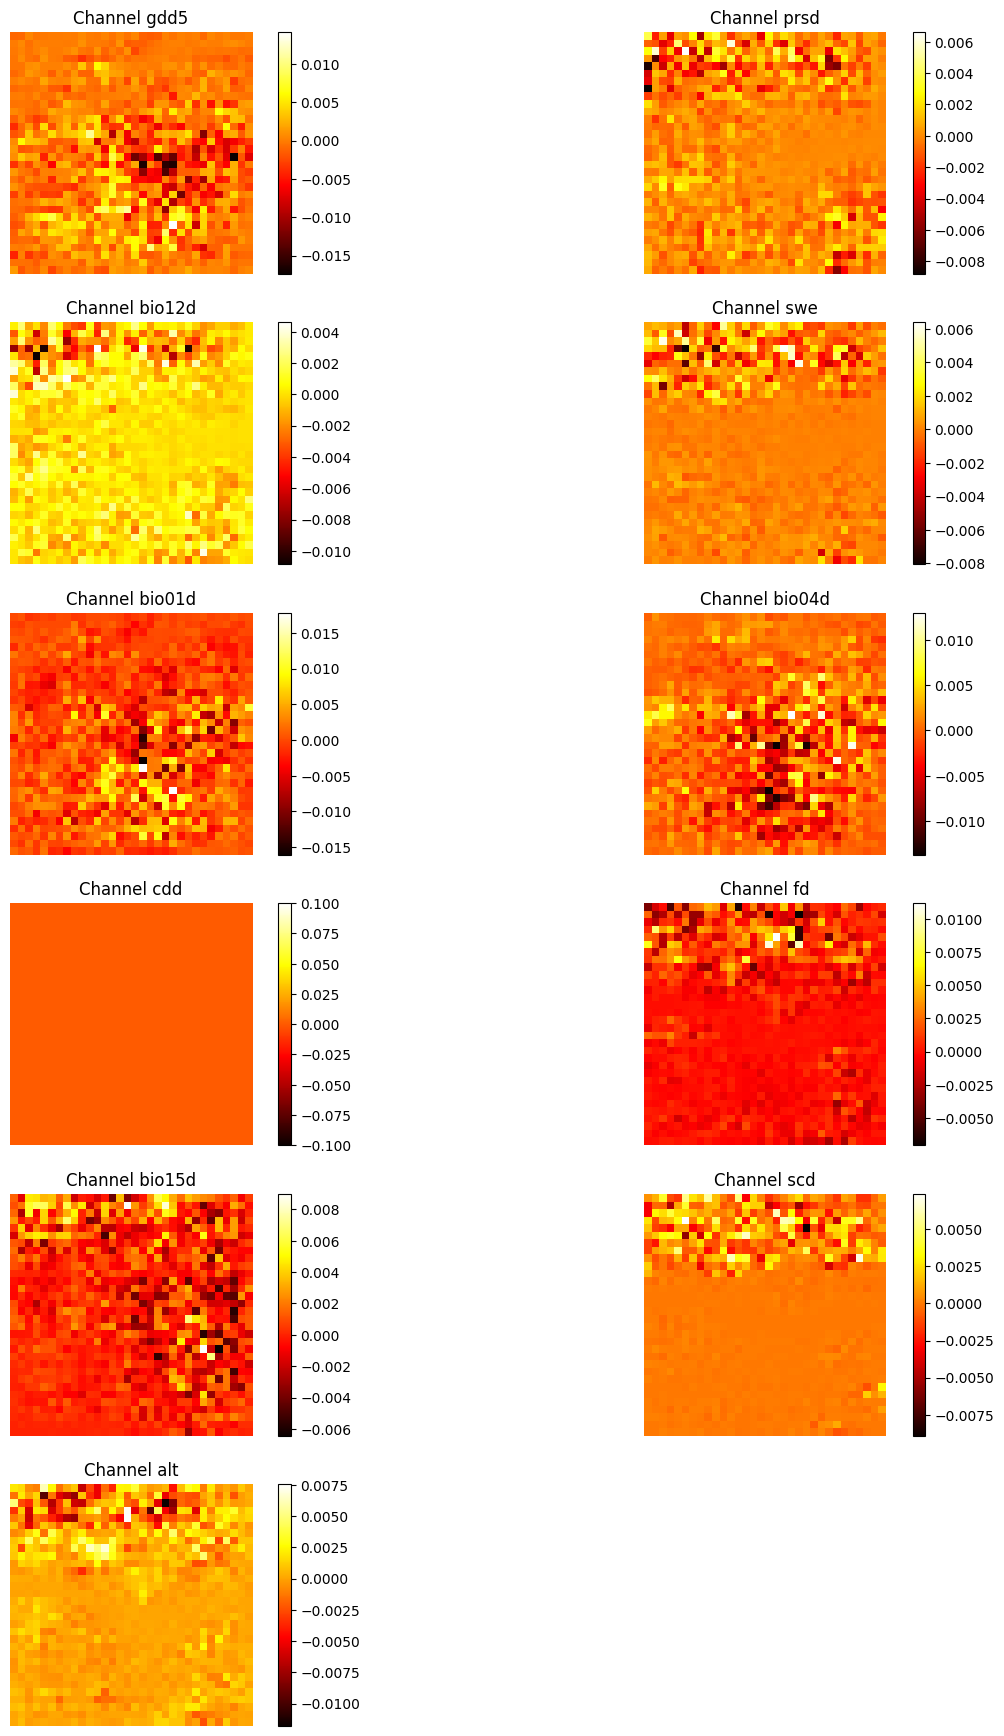

In [237]:
# Optionally, visualize the attribution for a specific channel (e.g., the first channel)
# Plot all channels

num_channels=11

plt.figure(figsize=(15, 2 * num_channels))

climatic_variables = ['gdd5', 'prsd', 'bio12d', 'swe', 'bio01d', 'bio04d', 'cdd', 'fd', 'bio15d', 'scd','alt']

for i in range(num_channels):
    channel_visualization = attributions[0, i].detach().cpu().numpy()  # Take the first image in the batch
    plt.subplot((num_channels + 1) // 2, 2, i + 1)
    plt.imshow(channel_visualization, cmap='hot')
    plt.colorbar()
    plt.title(f"Channel {climatic_variables[i]}")
    plt.axis('off')

plt.show()


#### Testing

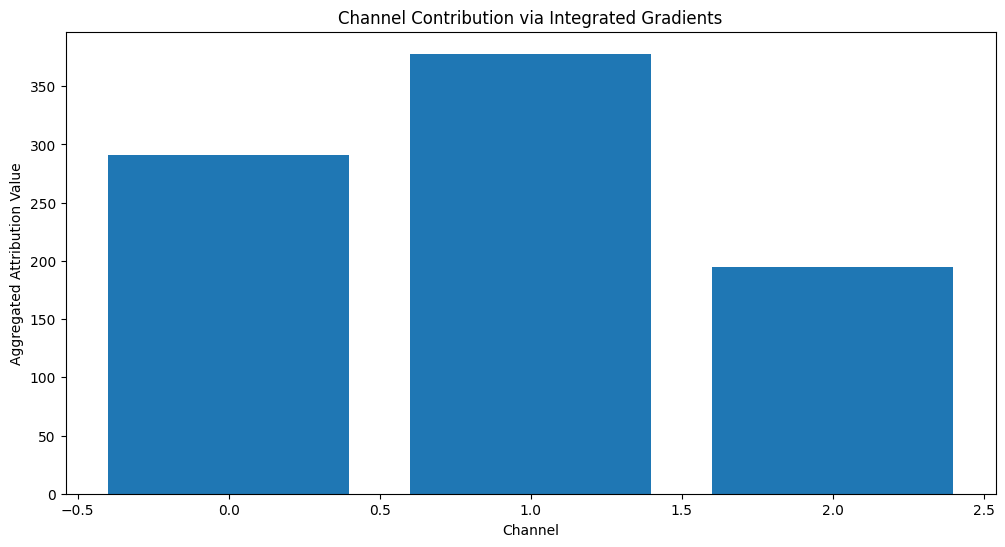

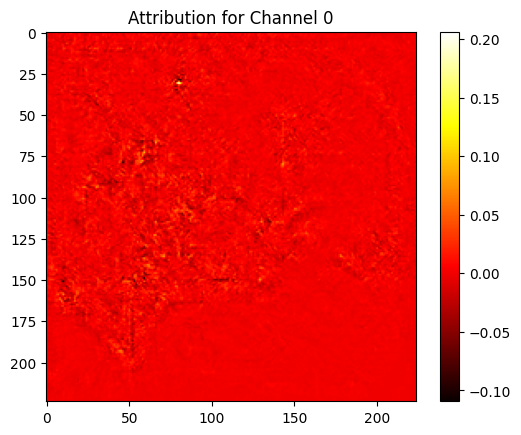

In [207]:
import torch
import matplotlib.pyplot as plt
from torchvision import models, datasets, transforms
from captum.attr import IntegratedGradients
import numpy as np

# Load a pre-trained ResNet18 model
model = models.resnet18(pretrained=True)
model.eval()

# Example dataset (e.g., CIFAR-10 or any other dataset)
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224))])  # Resize for ResNet input
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
image, _ = dataset[0]  # Load the first image from the dataset
image = image.unsqueeze(0)  # Add batch dimension

# Define the IntegratedGradients attribution method
ig = IntegratedGradients(model)

# Calculate the attribution for the image
attributions, delta = ig.attribute(image, target=0, return_convergence_delta=True)  # Assuming target is class 0

# The attribution result has shape (batch_size, channels, height, width)
# We want to analyze the contribution of each channel. Let's aggregate over the height and width.
channel_attributions = torch.sum(torch.abs(attributions), dim=(2, 3))  # Sum over height and width for each channel

# Convert to numpy for easier plotting
channel_attributions = channel_attributions.detach().cpu().numpy()

# Plot the channel contributions
plt.figure(figsize=(12, 6))
plt.bar(range(len(channel_attributions[0])), channel_attributions[0])  # Only the first image in the batch
plt.title('Channel Contribution via Integrated Gradients')
plt.xlabel('Channel')
plt.ylabel('Aggregated Attribution Value')
plt.show()

# Optionally, visualize the attribution for a specific channel (e.g., the first channel)
channel_index = 0
channel_visualization = attributions[0, channel_index].detach().cpu().numpy()

plt.imshow(channel_visualization, cmap='hot')
plt.colorbar()
plt.title(f'Attribution for Channel {channel_index}')
plt.show()


In [185]:
inputs, labels = next(iter(dataloader))
inputs[0]

'i'

## GradCAM

In [167]:
# All imports
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.models import resnet18
from torchvision.transforms.functional import normalize, resize, to_pil_image

from torchcam.methods import SmoothGradCAMpp, LayerCAM
from torchcam.utils import overlay_mask

In [176]:
cam_extractor = SmoothGradCAMpp(MODEL)
# Get your input
# Preprocess it for your chosen model
input_tensor =images[0]

# Preprocess your data and feed it to the model
out = MODEL(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
cams = cam_extractor(out.squeeze(0).argmax().item(), out)

RuntimeError: Given groups=1, weight of size [64, 11, 7, 7], expected input[1, 3, 224, 224] to have 11 channels, but got 3 channels instead

In [109]:

# get the image from the dataloader
img, _ = next(iter(dataloader))
img
# get the most likely prediction of the model
# pred = RESNET18(img).argmax(dim=1)

'images'

In [110]:
df_2018.iloc[0].species[2]

'Lysimachia europaea'

### Single Predictions

In [111]:
img_num = 0

# Load image and label
image_np = df_2018.iloc[img_num]['climatic_map'].astype(np.float32)  # shape: (H, W, 11)
label_np = df_2018.iloc[img_num]['species_vector'].astype(np.float32)  # shape: (num_classes,)

# Convert to torch tensors
image_tensor = torch.tensor(image_np).permute(2, 0, 1).unsqueeze(0).to(device)  # [1, 11, H, W]
label_tensor = torch.tensor(label_np).unsqueeze(0).to(device)  # [1, num_classes]

        

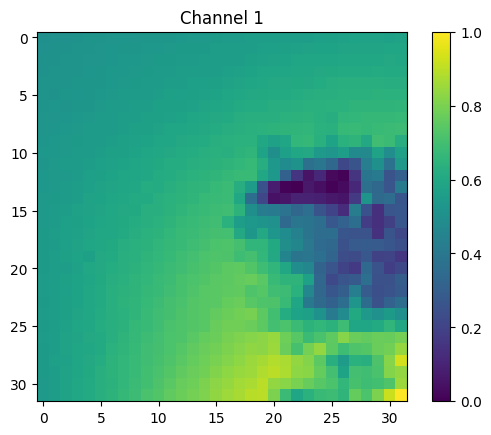

In [112]:
import matplotlib.pyplot as plt

# Assuming 'image_np' has shape (H, W, 11)
# Visualizing the first channel (for example)
channel_idx = 0  # You can change this to visualize other channels
channel_image = image_np[:, :, channel_idx]

plt.imshow(channel_image, cmap='viridis')  # 'viridis' is a perceptually uniform colormap
plt.colorbar()  # Add color bar to see the scale of values
plt.title(f"Channel {channel_idx + 1}")
plt.show()


In [113]:
# Load the NetCDF file
def read_netcdf(file_path,latitude,longitude,grid,location,variable = None):
    data = xr.open_dataset(file_path)
    
    # Step 1: Find the indices of the closest grid point
    lat_idx = np.argmin(np.abs(data['lat'].values - latitude))
    lon_idx = np.argmin(np.abs(data['lon'].values - longitude))
    
    # Step 2: Select all months of the year
    #precipitation= data.sel(**{"time": slice(1, 12)})

    # Extract variable name (it is always the last variable)
    variable = list(data.data_vars.keys())[-1]
    # Step 3: Extract a 10x10 grid centered around Bergen
    patch = data[variable].isel(
        lat=slice(lat_idx - grid, lat_idx + grid),
        lon=slice(lon_idx - grid, lon_idx + grid)
    )
    
    # Step 4: Calculate the mean precipitation across all months
    #mean_patch = patch.mean(dim="time")
    
    # Step 5: Plot with Cartopy for map context
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree assumes latitude/longitude
    
    # Plot the precipitation data
    # mean_patch.plot(ax=ax, cmap="Blues", transform=ccrs.PlateCarree(), add_colorbar=True)
    patch.plot(ax=ax, cmap="Blues", transform=ccrs.PlateCarree(), add_colorbar=True)
    
    # Add map features
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')  # Country borders
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')               # Coastline
    # ax.set_extent([mean_patch.lon.min(), mean_patch.lon.max(), mean_patch.lat.min(), mean_patch.lat.max()])
    ax.set_extent([patch.lon.min(), patch.lon.max(), patch.lat.min(), patch.lat.max()])

    
    # Add city marker for Bergen
    plt.scatter(longitude, latitude, color="red", label=location, transform=ccrs.PlateCarree())
    plt.legend()
    
    # Title and labels
    plt.title(f"{variable} in {location}, (10x10 grid)")
    plt.show()

    return patch

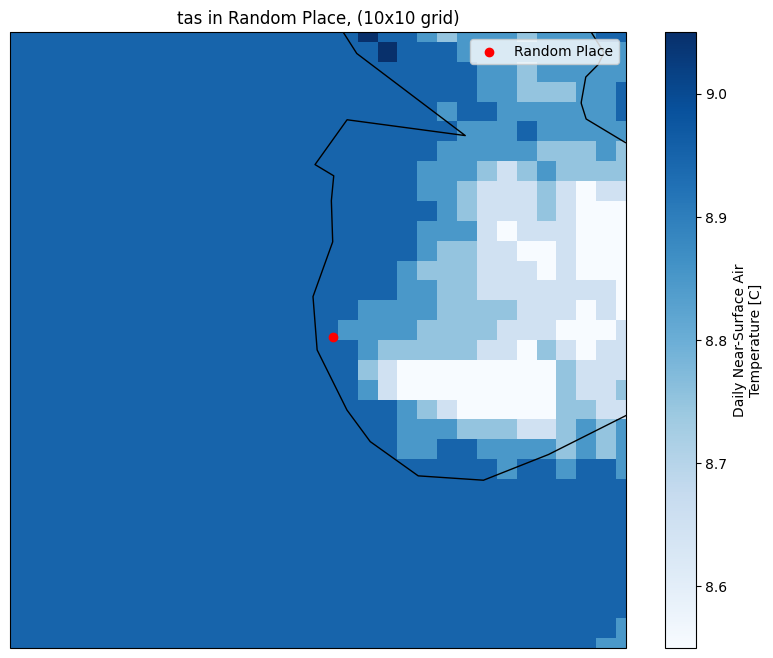

In [114]:
path_temperature = '../data/CHELSA/chelsav2/EUR11/obs/annual/V2.1/bio01d/CHELSA_EUR11_obs_bio01d_2018_V.2.1.nc'

altitude_test = read_netcdf(file_path = path_temperature, #path_prsd,
            latitude = df_2018.iloc[img_num]['latitude'],
            longitude = df_2018.iloc[img_num]['longitude'],
            # variable = 'pr',
            grid = 16,
            location = 'Random Place')

In [115]:
image_tensor.shape

torch.Size([1, 11, 32, 32])

In [116]:
output = RESNET18(image_tensor)

In [117]:
output

tensor([[-0.8852, -1.1244,  0.5729,  ..., -3.1074, -0.1222,  0.4111]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [118]:
# get the gradient of the output with respect to the parameters of the model
output[:, 2].backward()

In [119]:
# pull the gradients out of the model
gradients = RESNET18.get_activations_gradient()

# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

# get the activations of the last convolutional layer
activations = RESNET18.get_activations()



In [120]:
activations

tensor([[[[-0.0823,  0.9987],
          [ 0.3722,  0.9899]],

         [[ 0.3596, -0.0590],
          [-0.3387, -0.4386]],

         [[-0.4415,  0.1573],
          [-0.7247, -0.8028]],

         ...,

         [[ 0.6903,  1.6716],
          [ 0.5731,  1.0634]],

         [[-0.2955, -0.4276],
          [-0.6250, -0.8927]],

         [[ 0.3043, -0.0019],
          [ 0.4141,  0.1475]]]], device='cuda:0')

In [130]:
import matplotlib.pyplot as plt
import torch

# Assuming activations and pooled_gradients are already computed

# Detach activations from the computation graph
activations = activations.detach()
# scale_factor = 1e10  # Example scaling factor, adjust as needed
# activations *= scale_factor
print("Activations shape:", activations.shape)

print("Pooled gradients shape:", pooled_gradients.shape)

# Weight the channels by corresponding gradients
for i in range(256):
    activations[:, i, :, :] *= pooled_gradients[i]
    
print("Activations shape after weighting:", activations.shape)
# print(activations)
# Average across the channels (dim=1) to get a single channel heatmap
heatmap = torch.mean(activations, dim=1).squeeze()  # Keep the shape [1, 1, 1, 1] or [batch_size, 1, H, W]
print("Heatmap shape after averaging:", heatmap.shape)

# Apply ReLU on the heatmap to remove negative values
heatmap = torch.maximum(heatmap, torch.tensor(0.0, device=device))
print("Heatmap values before normalization:", heatmap)

# Normalize the heatmap to the range [0, 1] for visualization
heatmap /= torch.max(heatmap)

# # Convert the heatmap to numpy (if on GPU, first move it to CPU)
heatmap_np = heatmap.cpu().detach().numpy()
heatmap_np
# # Print the heatmap shape and values before visualization
# print("Heatmap shape:", heatmap.shape)
# print("Heatmap values after normalization:", heatmap)


Activations shape: torch.Size([1, 256, 2, 2])
Pooled gradients shape: torch.Size([512])
Activations shape after weighting: torch.Size([1, 256, 2, 2])
Heatmap shape after averaging: torch.Size([2, 2])
Heatmap values before normalization: tensor([[0.0000e+00, 0.0000e+00],
        [2.0760e-08, 8.8629e-07]], device='cuda:0')


array([[0.        , 0.        ],
       [0.02342331, 1.        ]], dtype=float32)

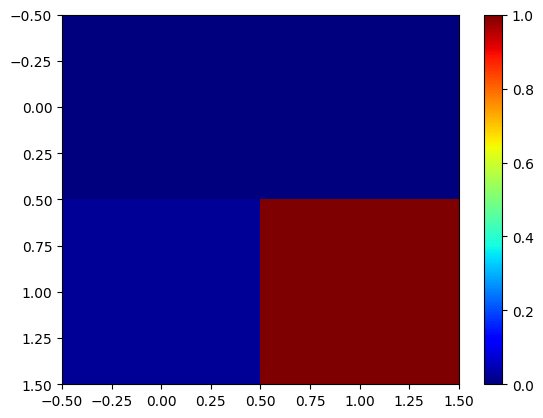

In [131]:

# Visualize the heatmap
plt.imshow(heatmap_np, cmap='jet', aspect='auto')  # Using squeeze just for visualization
plt.colorbar()
plt.show()


In [132]:
import torch
import torch.nn.functional as F

# Assuming attention_map is a 4D tensor (batch_size, channels, height, width)
# Example attention map (2, 2) in batch format with a single channel
# attention_map = torch.tensor([[[[1.0, 0.0], 
#                                 [0.32757732, 0.0]]]], dtype=torch.float32)

# Resize the attention map to the original size (32, 32)
attention_map_resized = F.interpolate(heatmap, size=(32, 32), mode='bilinear', align_corners=False)

# Now attention_map_resized will be of shape (1, 1, 32, 32)
print(attention_map_resized.shape)


ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [] and output size of (32, 32). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

/tmp/ipykernel_15999/891303769.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_map_resized = torch.tensor(attention_map_resized, dtype=torch.float32)  # Convert to tensor


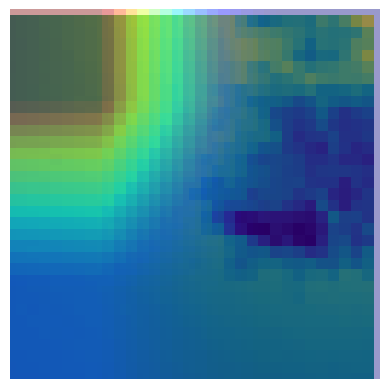

In [133]:
from torchvision.transforms.functional import to_pil_image
from matplotlib import colormaps
import numpy as np
import PIL
import torch
import matplotlib.pyplot as plt

# # Assuming image is a (32, 32, 11) NumPy array, and attention_map is (1, 1, 32, 32)
# image = np.random.rand(32, 32, 11)  # Shape (32, 32, 11)
# attention_map_resized = np.random.rand(1, 1, 32, 32)  # Shape (1, 1, 32, 32)

# Step 1: Convert the attention map to a PIL image and resize it
attention_map_resized = torch.tensor(attention_map_resized, dtype=torch.float32)  # Convert to tensor
attention_map_resized = attention_map_resized.squeeze(0).squeeze(0)  # Remove the batch and channel dimensions

# Convert attention map to PIL and resize it
overlay = to_pil_image(attention_map_resized, mode='F').resize((32, 32), resample=PIL.Image.BICUBIC)

# Apply the colormap
cmap = colormaps['jet']
overlay = (255 * cmap(np.asarray(overlay) ** 2)[:, :, :3]).astype(np.uint8)

# Step 2: Create a plot to overlay the attention map on the image
fig, ax = plt.subplots()
ax.axis('off')  # Remove axis markers

# Convert the image (32, 32, 11) to PIL and display the first channel (RGB mode)
img_pil = to_pil_image(image_np[..., 0], mode='L')
ax.imshow(img_pil)

# Step 3: Overlay the attention map on top with transparency
ax.imshow(overlay, alpha=0.4, interpolation='nearest', extent=[0, 32, 0, 32])

# Show the plot
plt.show()


In [245]:
heatmap

array([[1.]], dtype=float32)